In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the California Housing dataset (similar to Boston housing, built-in)
housing = fetch_california_housing()

In [ ]:
# Convert to a DataFrame for easy exploration
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target

In [ ]:
# Check the first few rows
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the KNN regressor with K=5
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [ ]:
# Print the first few predicted values
print("Predicted values:", y_pred[:5])

Predicted values: [0.4988   0.7646   4.750006 2.8766   2.7262  ]


In [ ]:
# Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.43
R² Score: 0.67


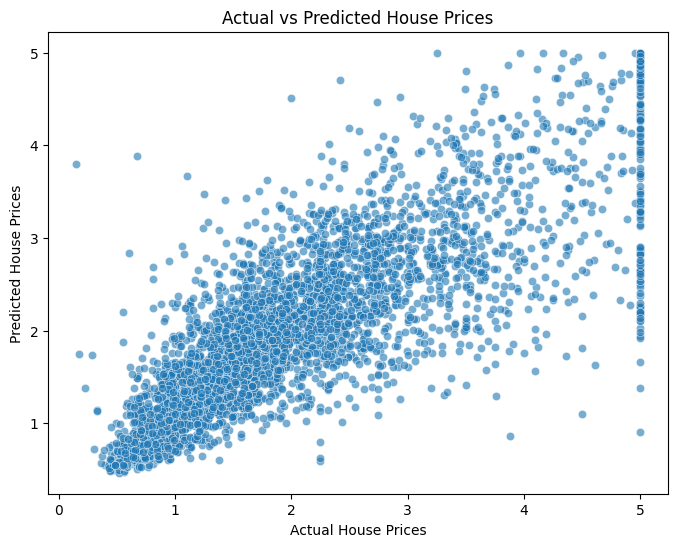

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
# Train with a different K value (e.g., K=3)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the new model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"New MSE with K=3: {mse:.2f}")
print(f"New R² Score with K=3: {r2:.2f}")

New MSE with K=3: 0.47
New R² Score with K=3: 0.64
